In [1]:
from dotenv import load_dotenv
load_dotenv()
import os

In [2]:
import json
with open('data_index.json', 'r') as f:
    data_index = json.load(f)
data_index

{'1017': '1017_sci-news.com.html',
 '1028': '1028_redorbit.com.html',
 '1034': '1034_aol.com.html',
 '1050': '1050_honda.com.html',
 '105': '105_amazon.com.html',
 '1070': '1070_wnep.com.html',
 '1083': '1083_highgearmedia.com.html',
 '1089': '1089_freep.com.html',
 '1099': '1099_enthusiastnetwork.com.html',
 '1106': '1106_allstate.com.html',
 '1164': '1164_acbj.com.html',
 '1205': '1205_opensecrets.org.html',
 '1206': '1206_dcccd.edu.html',
 '1221': '1221_gwdocs.com.html',
 '1224': '1224_austincc.edu.html',
 '1252': '1252_cincymuseum.org.html',
 '1259': '1259_fool.com.html',
 '1261': '1261_zacks.com.html',
 '1264': '1264_citizen.org.html',
 '1300': '1300_bankofamerica.com.html',
 '1306': '1306_chasepaymentech.com.html',
 '133': '133_fortune.com.html',
 '135': '135_instagram.com.html',
 '1360': '1360_thehill.com.html',
 '1361': '1361_yahoo.com.html',
 '1419': '1419_miaminewtimes.com.html',
 '144': '144_style.com.html',
 '1468': '1468_rockstargames.com.html',
 '1470': '1470_steampowered

In [3]:
from langchain.document_loaders import TextLoader
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.text_splitter import CharacterTextSplitter
from langchain.vectorstores import FAISS

from langchain.llms import OpenAI
embeddings = OpenAIEmbeddings()
llm = OpenAI(temperature=0)


def make_data_path(index_number):
    return os.path.join(
        'data/OPP-115/sanitized_policies/', 
        data_index[str(index_number)],
    )

def make_db_path(input_file):
    return os.path.join('db', f'{input_file}.faiss')
    

def make_faiss_db(input_file):
    raw_documents = TextLoader(input_file).load()
    text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0, separator='<br>')
    documents = text_splitter.split_documents(raw_documents)

    db = FAISS.from_documents(documents, embeddings)
    db.save_local(make_db_path(input_file))
    return db

# make_faiss_db('sample_terms/baseline.txt')
# make_faiss_db('sample_terms/malicious.txt')

In [225]:
input_file = 'sample_terms/baseline.txt'
db1 = FAISS.load_local(os.path.join('db', f'{input_file}.faiss'), embeddings)
input_file = 'sample_terms/malicious.txt'
db2 = FAISS.load_local(os.path.join('db', f'{input_file}.faiss'), embeddings)

In [4]:
def query_data_collected(doc_db):
    query = "What personal data is collected?"
    docs = doc_db.similarity_search(query)
    search_result = '\n'.join(d.page_content for d in docs)

    return llm.predict(f'''
   Here are fragments of a privacy policy.

    For each of the item below, check if it is collected according to the framents:           
    - email address 
    - first and last name 
    - phone number 
    - postal address 
    - zip code 
    - IP address 
    - browser used 
    - device identifier 
    - social media info 
    - contacts or connections 
    - phone book 
    - photos or videos 
    - credit card or bank account info 
    - gender 
    - date and time of visit 
    - social security number 
    - drivers license number 
    - location info 

    Each of the above should be assigned a boolean value.

    Return a YAML

    In addition, add an extra field:
    other: a string under 15 words describing what is collected other than the above
                
    fragments of a privacy policy: {search_result}
    list of personal data items:

    ''')

# query_data_collected(db1), query_data_collected(db2), 

In [5]:
def query_retention_policy(doc_db):
    query = '''
    what is the retention policy?
    '''

    docs = doc_db.similarity_search(query)
    search_result = '\n'.join(d.page_content for d in docs)

    return llm.predict(f'''
    what is the retention policy?

    For example, 1 month, 3 months, as long as it takes, unspecified

    return a string

    fragments of a privacy policy: {search_result}
    retention policy:

    ''')
# query_retention_policy(db)

In [183]:
 def query_usage_scope(doc_db):
    query = '''
    what is the personal information used for?
    '''

    docs = doc_db.similarity_search(query)
    search_result = '\n'.join(d.page_content for d in docs)

    return llm.predict(f'''
    what are the uses of the collected personal information?
    
    Rephrase each usage under 10 words
    Each usage should begin with a verb followed by 3 to 10 words
    return a comma-separated list of usages, 

    fragments of a privacy policy: {search_result}
    usage of personal information:

    ''')
 

 def query_data_transfer_policy(doc_db):
    query = '''
    Will the data be transfered to third parties or other jurisdiction?
    If yes, where?
    '''

    docs = doc_db.similarity_search(query)
    search_result = '\n'.join(d.page_content for d in docs)

    return llm.predict(f'''
    Will the data be transfered to third parties or other jurisdiction?

    return a string under 10 words

    fragments of a privacy policy: {search_result}
    data transfer policy:

    ''')

In [184]:
query_usage_scope(db2)

' Collect personal information, Retain personal data, Protect against legal liability, Secure personal data, Collect information from device, Share personal information with consent.'

In [106]:
query_data_transfer_policy(db)

' Data may be transferred to other parties in certain business transactions, in response to legal process, or when necessary to protect our Services. International users should be aware that data may be transferred to and stored in the U.S.'

In [50]:
subset_data = data_index.keys()

In [13]:
for i in subset_data:
    p = make_data_path(i)
    make_faiss_db(p)

Created a chunk of size 1066, which is longer than the specified 1000
Created a chunk of size 1010, which is longer than the specified 1000
Created a chunk of size 1249, which is longer than the specified 1000
Created a chunk of size 1267, which is longer than the specified 1000
Created a chunk of size 1419, which is longer than the specified 1000
Created a chunk of size 1363, which is longer than the specified 1000
Created a chunk of size 1310, which is longer than the specified 1000
Created a chunk of size 1309, which is longer than the specified 1000
Created a chunk of size 1053, which is longer than the specified 1000
Created a chunk of size 1308, which is longer than the specified 1000
Created a chunk of size 1106, which is longer than the specified 1000
Created a chunk of size 1303, which is longer than the specified 1000
Created a chunk of size 1105, which is longer than the specified 1000
Created a chunk of size 2107, which is longer than the specified 1000
Created a chunk of s

In [186]:
usages = {}
for i in tqdm(subset_data):
    p = make_data_path(i)
    db = FAISS.load_local(make_db_path(p), embeddings)
    r = query_usage_scope(db)
    usages[i] = r

100%|██████████| 115/115 [04:46<00:00,  2.49s/it]


In [224]:

from joblib import Parallel, delayed

def p_usage(i):
    p = make_data_path(i)
    db = FAISS.load_local(make_db_path(p), embeddings)
    r = query_usage_scope(db)
    return i, r

usages_p = Parallel(n_jobs=4)(delayed(p_usage)(i) for i in tqdm(subset_data))
dict(usages_p)

100%|██████████| 115/115 [01:16<00:00,  1.51it/s]


In [254]:
splited = query_usage_scope(db1).split(',')
embeds = embeddings.embed_documents(splitted)

this_umap = umap.transform(np.array(embeds))
this_cluster, _ = hdbscan.approximate_predict(clusterer, this_umap)
num_outliers = (this_cluster == -1).sum()
num_outliers

1

In [187]:
usages_csv = usages

In [3]:
import joblib
joblib.load('usage_model.joblib')

AttributeError: Can't get attribute 'UsagePredictor' on <module '__main__'>

In [7]:
# import joblib
# usages = joblib.load('usages.joblib')

In [227]:
# import joblib
# joblib.dump(usages_csv, 'usages_csv_verb.joblib')
# usages_csv

In [209]:
from tqdm import tqdm

doc_ids = []
doc_tokens = []
doc_embeds = []
for k, v in tqdm(usages_csv.items()):
    splitted = v.split(',')
    embeds = embeddings.embed_documents(splitted)

    doc_ids.extend([k] * len(splitted))
    doc_tokens.extend(splitted)
    doc_embeds.extend(embeds)

100%|██████████| 115/115 [00:30<00:00,  3.76it/s]


In [190]:
# from itertools import chain
# all_usage_chained = list(chain.from_iterable(usages_csv_embedding.values()))

is_outlier
0    53
1    32
2    20
3     6
4     4
Name: count, dtype: int64

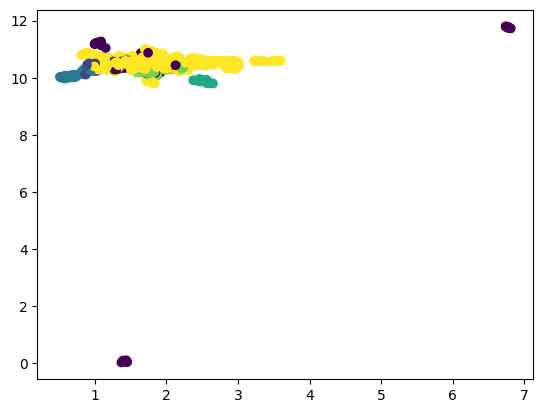

In [250]:
from umap import UMAP
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor
# from sklearn.preprocessing import FunctionTransformer
from hdbscan import HDBSCAN
import hdbscan

pipe = Pipeline([('umap', UMAP()), ('kmeans', KMeans())])
umap = UMAP(
    n_components=16, 
    n_neighbors=10,
    )
# clusterer = KMeans(n_clusters=3)
clusterer = HDBSCAN(
    min_cluster_size=30, 
    min_samples=15,
    prediction_data=True
)

umap.fit(np.array(doc_embeds))
t_umap = umap.transform(np.array(doc_embeds))
clusterer.fit(t_umap)
t_cluster, t_strength = hdbscan.approximate_predict(clusterer, t_umap)

plt.scatter(t_umap[:,0], t_umap[:,1], c=t_cluster)

pd.DataFrame([all_usage_chained, t_cluster])

summary_df = pd.DataFrame(
    [doc_ids, 
    doc_tokens, 
    t_cluster.squeeze(),
]).T.sort_values(2)

summary_df.columns = ['doc_id', 'token', 'cluster']
(
    summary_df
    .assign(is_outlier=lambda df: df['cluster']==-1)
    .groupby('doc_id')['is_outlier']
    .sum()
    .value_counts()
)


In [247]:
t_strength

array([0, 2, 2, ..., 2, 2, 2], dtype=int32)

1
5     157
1     154
-1    134
4     120
2     119
0     118
3      66
Name: count, dtype: int64

1
-1    194
5      81
12     78
13     51
14     46
15     46
3      42
0      42
9      40
4      39
7      31
11     29
16     26
2      23
6      23
17     22
8      20
1      19
10     18
Name: count, dtype: int64

In [8]:
user_embeddings = embeddings.embed_documents(list(usages.values()))

In [9]:
user_embeddings = dict(zip(usages.keys(), user_embeddings))

In [19]:
import pandas as pd
pd.DataFrame(user_embeddings).T.to_clipboard(index=None, columns=None, sep=',')

In [11]:
pipe

Pipeline(steps=[('umap',
                 UMAP(tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})),
                ('kmeans', KMeans())])

/Users/yawerijaz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


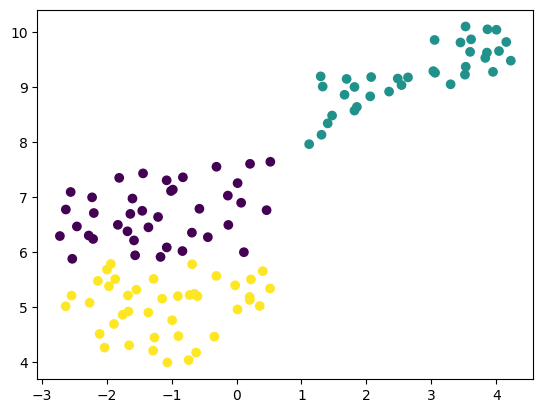

In [28]:
from umap import UMAP
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
pipe = Pipeline([('umap', UMAP()), ('kmeans', KMeans())])
umap = UMAP()
kmeans = KMeans(n_clusters=3)
t_umap = umap.fit_transform(np.array(list(user_embeddings.values())))
t_kmeans = kmeans.fit_predict(t_umap)
plt.scatter(t_umap[:,0], t_umap[:,1], c=kmeans.predict(t_umap))


In [47]:
import pandas as pd
pd.DataFrame([usages]).T.assign(cluster=t_kmeans).sort_values('cluster').to_csv('usage_cluster.csv')
# usages
# t_kmeans

array([ 1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1,
       -1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1, -1,
        1, -1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
        1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1,  1])

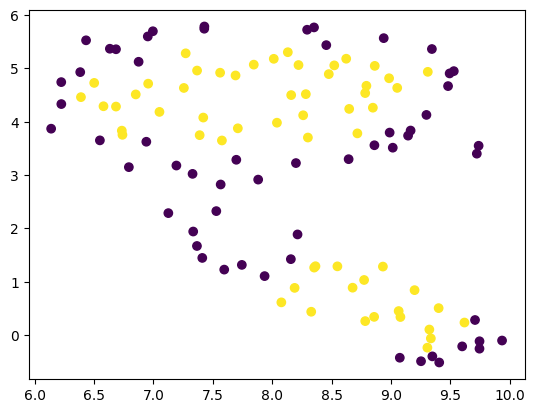

In [37]:
from umap import UMAP
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.neighbors import LocalOutlierFactor
pipe = Pipeline([('umap', UMAP()), ('kmeans', KMeans())])
umap = UMAP()
lof = LocalOutlierFactor(contamination=0.5)
t_umap = umap.fit_transform(np.array(list(user_embeddings.values())))
t_lof = lof.fit_predict(t_umap)
plt.scatter(t_umap[:,0], t_umap[:,1], c=t_lof)
t_lof

In [14]:
import numpy as np
clusterer.fit_predict(np.array(list(user_embeddings.values())))

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [19]:
from sklearn.manifold import TSNE
import numpy as np

In [ ]:
tttt = TSNE()
tttt.fit_transform(np.array(list(user_embeddings.values())))

: 

: 